Best k = 20, Score = 1.000
ir | Accuracy
--|---------
1 | 1.000
2 | 1.000
3 | 1.000
4 | 1.000
5 | 1.000
6 | 1.000
7 | 0.967
8 | 1.000
9 | 1.000
10 | 1.000
11 | 1.000
12 | 1.000
13 | 1.000
14 | 1.000
15 | 1.000
16 | 1.000
17 | 1.000
18 | 1.000
19 | 1.000
20 | 1.000

Best iris: 1, Iris score: 1.000


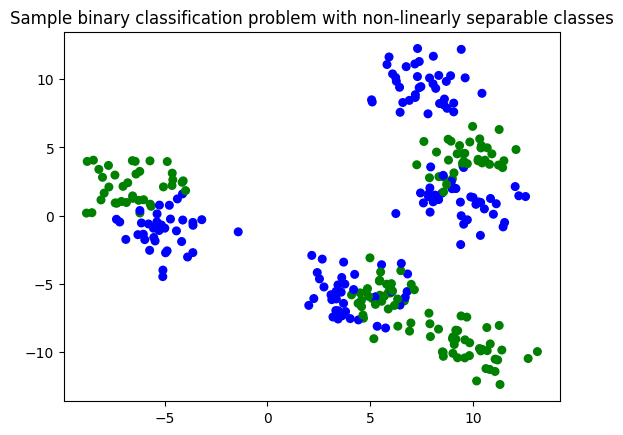

Best k = 20, Score = 0.091


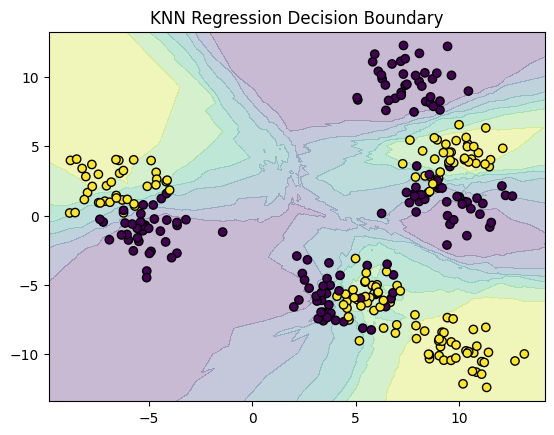

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from matplotlib.colors import ListedColormap


class KNNModel:
    def __init__(self, model_type="classifier", max_k=20):
        self.model_type = model_type
        self.max_k = max_k
        self.best_k = None
        self.best_score = None

    def fit_best_model(self, X_train, y_train, X_test, y_test):
        if self.model_type == "classifier":
            best_score = 0
            for k in range(1, self.max_k + 1):
                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(X_train, y_train)
                score = model.score(X_test, y_test)
                if score > best_score:
                    self.best_k, self.best_score = k, score
        else:
            best_score = float('inf')
            for k in range(1, self.max_k + 1):
                model = KNeighborsRegressor(n_neighbors=k)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = mean_squared_error(y_test, y_pred)
                if score < best_score:
                    self.best_k, self.best_score = k, score
        print(f'Best k = {self.best_k}, Score = {self.best_score:.3f}')

    def plot_decision_boundary(self, X, y, model, title):
        h = .02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
        plt.title(title)
        plt.show()


# 1. Iris Dataset
np.random.seed(2021)

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNNModel(model_type="classifier")
knn_classifier.fit_best_model(X_train, y_train, X_test, y_test)

best_iris = None
best_sc_rs = 0

print("ir | Accuracy")
print("--|---------")

for k in range(1, knn_classifier.max_k + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print(f"{k} | {score:.3f}")

    if score > best_sc_rs:
        best_iris, best_sc_rs = k, score

print(f"\nBest iris: {best_iris}, Iris score: {best_sc_rs:.3f}")



np.random.seed(2021)
cmap_bold = ListedColormap(['blue', '#FFFF00', 'black', 'green'])
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

knn_regressor = KNNModel(model_type="regressor")
knn_regressor.fit_best_model(X_train, y_train, X_test, y_test)

knn_best_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_k)
knn_best_model.fit(X_train, y_train)
knn_regressor.plot_decision_boundary(X_D2, y_D2, knn_best_model, "KNN Regression Decision Boundary")